In [10]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset (update the path accordingly)
data = pd.read_csv("C:/Users/DynaBook/Downloads/archive (11)/zomato.csv",encoding='ISO-8859-1')

# Display first few rows of the dataset to understand its structure
print(data.head())

# Cleaning column names (strip leading/trailing spaces)
data.columns = data.columns.str.strip()

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numerical columns
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# List of categorical columns
categorical_columns = ['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 
                       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 
                       'Switch to order menu', 'Rating color', 'Rating text']

# Encoding categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Defining the features (X) and the target variable (y)
X = data.drop(columns=['Aggregate rating', 'Restaurant ID'])  # 'Restaurant ID' is not relevant for prediction
y = data['Aggregate rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [11]:
# Importing the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [12]:
# Importing evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Calculating MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2605597377814244
R-squared: 0.44617777832773053


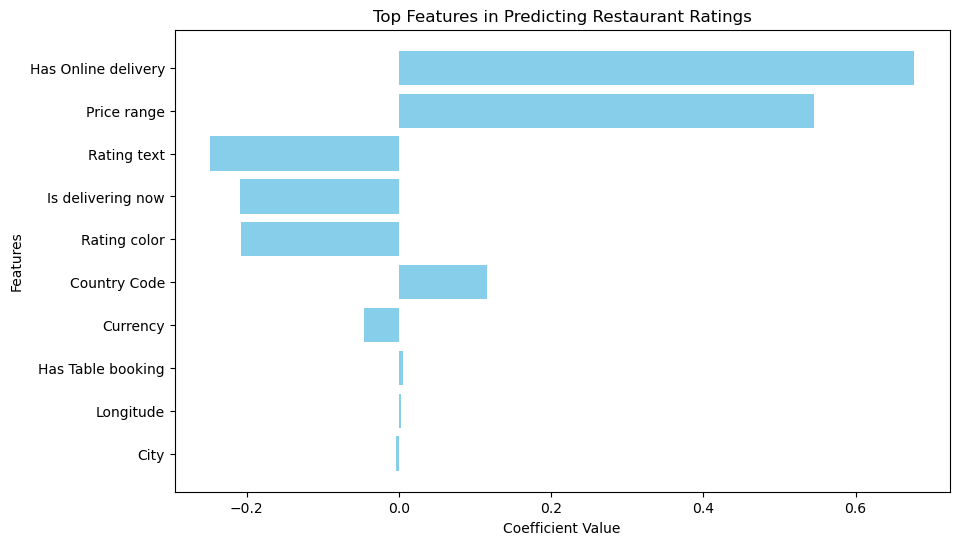

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize coefficients for better visibility
coefficients = model.coef_
feature_names = X.columns

# Sort features by absolute value of coefficients
sorted_idx = np.argsort(np.abs(coefficients))

# Filter for the top 10 most important features (optional)
top_features = 10
sorted_idx = sorted_idx[-top_features:]

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], coefficients[sorted_idx], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Top Features in Predicting Restaurant Ratings')
plt.show()


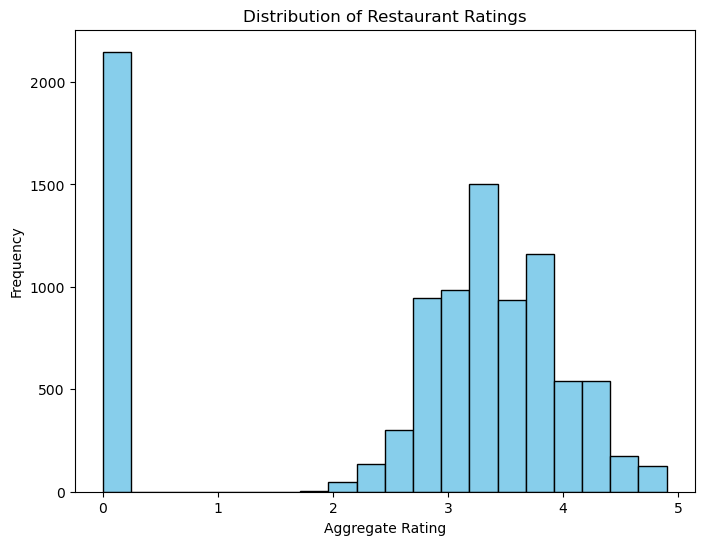

In [19]:
# Plotting the distribution of restaurant ratings
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()
